In [1]:
import numpy as n
import pandas as p
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
crimeAw= p.read_csv(r"C:\Users\admin\Downloads\archive\CrimesOnWomenData.csv")
crimeAw.drop(['Unnamed: 0'], axis=1, inplace=True)
crimeAw

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...
731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,Delhi UT,2021,2,1,0,5,1,9,0
734,Lakshadweep,2021,0,0,0,1,1,3,0


In [3]:
crimeAw.head()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [4]:
crimeAw.tail()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,Delhi UT,2021,2,1,0,5,1,9,0
734,Lakshadweep,2021,0,0,0,1,1,3,0
735,Puducherry,2021,2,0,2,31,3,12,0


In [5]:
crimeD = crimeAw.drop('Year',axis=1).describe().transpose()
crimeD

,count,mean,std,min,25%,50%,75%,max
Rape,736.0,727.855978,977.024945,0.0,35.00,348.5,1069.00,6337.0
K&A,736.0,1134.542120,1993.536828,0.0,24.75,290.0,1216.00,15381.0
DD,736.0,215.692935,424.927334,0.0,1.00,29.0,259.00,2524.0
AoW,736.0,1579.115489,2463.962518,0.0,34.00,387.5,2122.25,14853.0
AoM,736.0,332.722826,806.024551,0.0,3.00,31.0,277.50,9422.0
DV,736.0,2595.078804,4042.004953,0.0,13.00,678.5,3545.00,23278.0
WT,736.0,28.744565,79.999660,0.0,0.00,0.0,15.00,549.0


In [6]:
crimeAw.isnull().sum()

State    0
Year     0
Rape     0
K&A      0
DD       0
AoW      0
AoM      0
DV       0
WT       0
dtype: int64

In [7]:
crimeAw.duplicated().sum()

0

In [8]:
crimeAw.dtypes

State    object
Year      int64
Rape      int64
K&A       int64
DD        int64
AoW       int64
AoM       int64
DV        int64
WT        int64
dtype: object

In [9]:
crimeAw['State'].nunique()

70

In [10]:
#The states are described differently, the first time in all capital letters and the second time in lower case letters. Therefore, the first thing to do is standardize the writing format.
crimeAw['State']=crimeAw['State'].str.upper()
crimeAw['State'].nunique()

37

In [11]:
crimeAw['State'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA',
       'D&N HAVELI', 'DELHI UT'], dtype=object)

In [12]:
crimeAw['State'] = crimeAw['State'].str.replace('D&N HAVELI', 'D & N HAVELI')
crimeAw['State'].nunique()

36

In [13]:
crime_distribution = crimeAw.drop(['State','Year'], axis=1).sum()
crime_distribution

Rape     535702
K&A      835023
DD       158750
AoW     1162229
AoM      244884
DV      1909978
WT        21156
dtype: int64

In [14]:
# Standardize the way of writing the State "D & N HAVELI"
crimeAw['State'] = crimeAw['State'].str.replace('D&N HAVELI', 'D & N HAVELI')

<Figure size 1000x700 with 0 Axes>

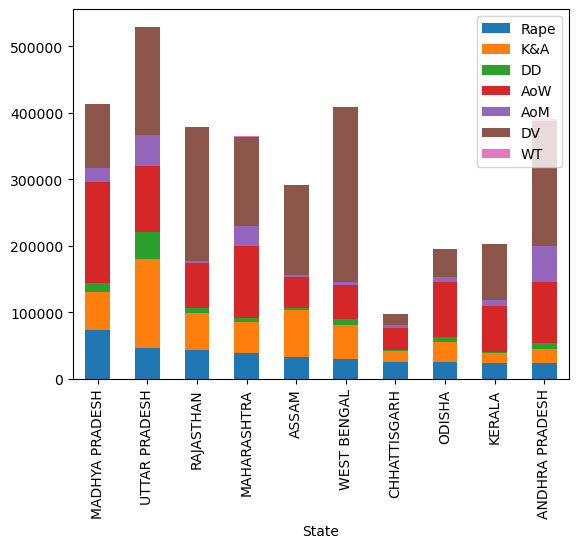

In [15]:
plt.figure(figsize=(10,7))
crimes= crimeAw.drop('Year',axis =1)
crimes.groupby('State').sum().sort_values('Rape',ascending=False).head(10).plot(kind='bar',stacked=True)
plt.show()

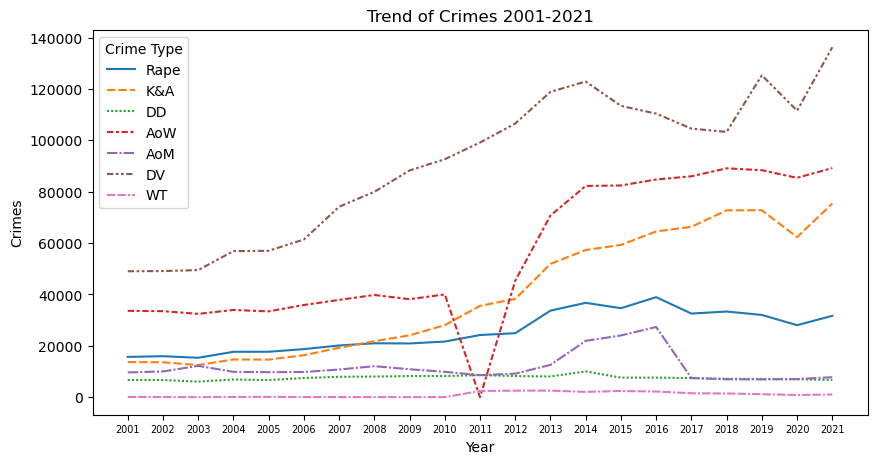

In [16]:
# Types of Crimes 2001-2021 - Lineplot
warnings.filterwarnings("ignore", category=FutureWarning)
crimeDf = crimeAw.groupby('Year').sum()
year = crimeDf.index.tolist()
plt.figure(figsize=(10,5))
sns.lineplot(data=crimeDf)
plt.title('Trend of Crimes 2001-2021')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.xticks(year,rotation=0, size = 7)
plt.legend(title='Crime Type', loc='upper left')
plt.show()

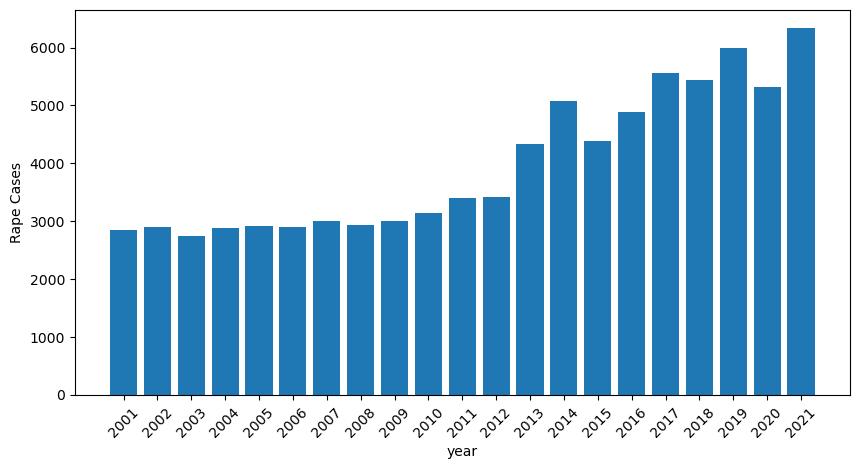

In [17]:
rape = crimeAw.groupby('Year')['Rape'].agg('sum')
plt.figure(figsize=(10,5))
plt.xlabel('year')
plt.ylabel('Rape Cases')
plt.xticks(year,rotation=45)
plt.bar(x='Year',data=crimeAw,height='Rape')
plt.show()

<Axes: >

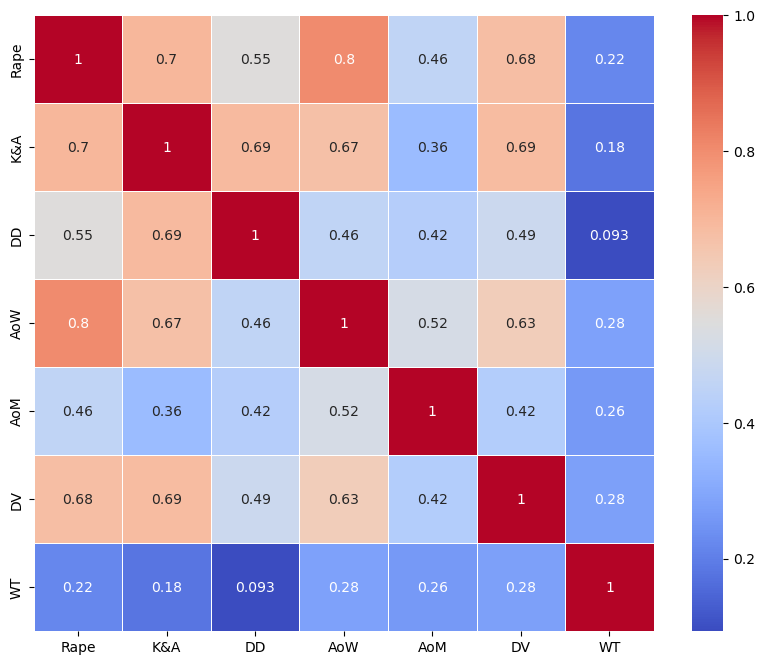

In [18]:
data_corr=crimeAw.drop(['State','Year'],axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(data_corr,annot=True,cmap="coolwarm",linewidths=0.5)

In [19]:
data_corr

,Rape,K&A,DD,AoW,AoM,DV,WT
Rape,1.000000,0.700730,0.553497,0.804336,0.458025,0.680321,0.219218
K&A,0.700730,1.000000,0.691524,0.671159,0.355703,0.685999,0.179016
DD,0.553497,0.691524,1.000000,0.456012,0.422970,0.487465,0.093254
AoW,0.804336,0.671159,0.456012,1.000000,0.521432,0.631558,0.284338
AoM,0.458025,0.355703,0.422970,0.521432,1.000000,0.419300,0.260077
DV,0.680321,0.685999,0.487465,0.631558,0.419300,1.000000,0.280839
WT,0.219218,0.179016,0.093254,0.284338,0.260077,0.280839,1.000000


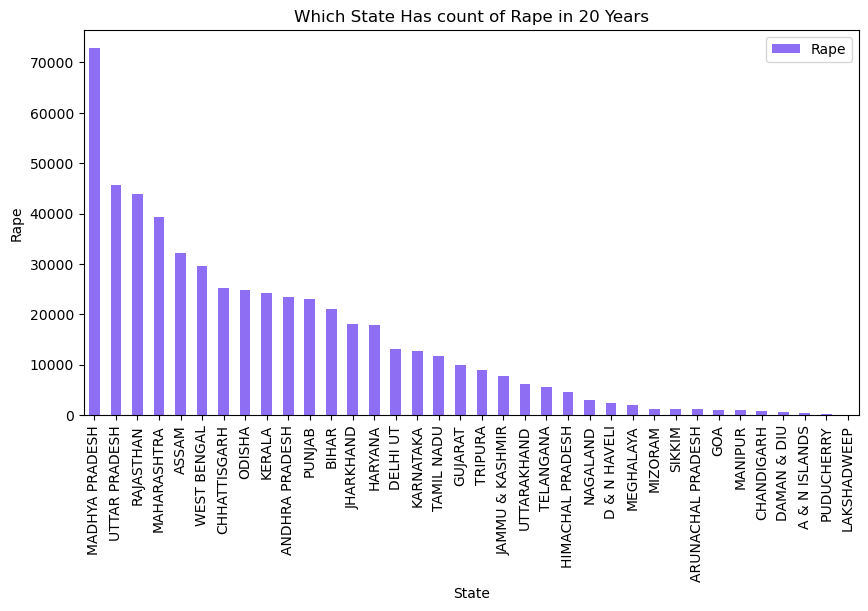

In [24]:
Rape = crimeAw.groupby(['State']).agg({
    'Rape': 'sum'
}).sort_values(by = 'Rape', ascending=False)
Rape.plot(kind='bar',figsize = (10,5),color='#8E6EF3')
plt.title('Which State Has count of Rape in 20 Years')
plt.xlabel('State')
plt.ylabel('Rape')

plt.show()

<Axes: xlabel='State'>

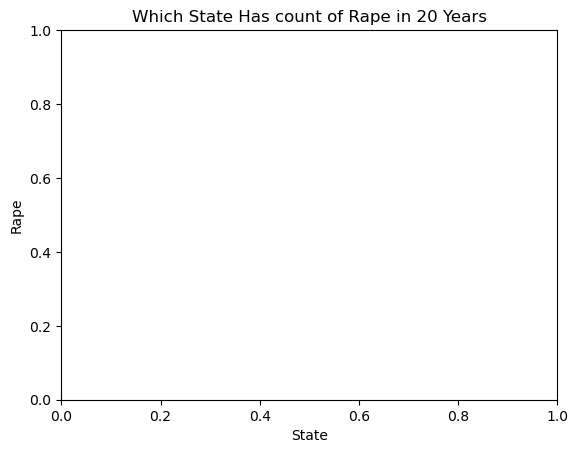

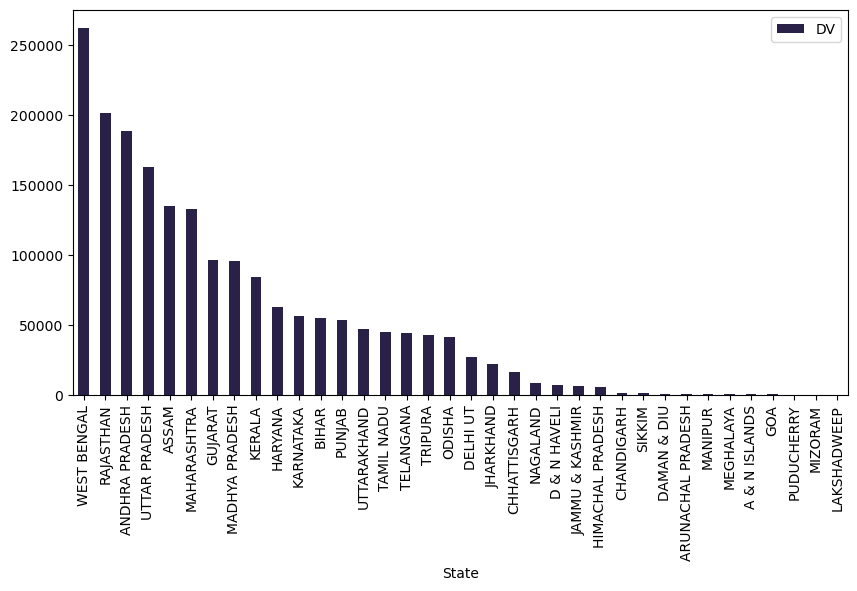

In [28]:
domesticViolence = crimeAw.groupby('State').agg({'DV':'sum'}).sort_values(by='DV',ascending=False)
plt.title('Which State Has count of Rape in 20 Years')
plt.xlabel('State')
plt.ylabel('Rape')
domesticViolence.plot(kind='bar',figsize = (10,5),color='#2A2148')

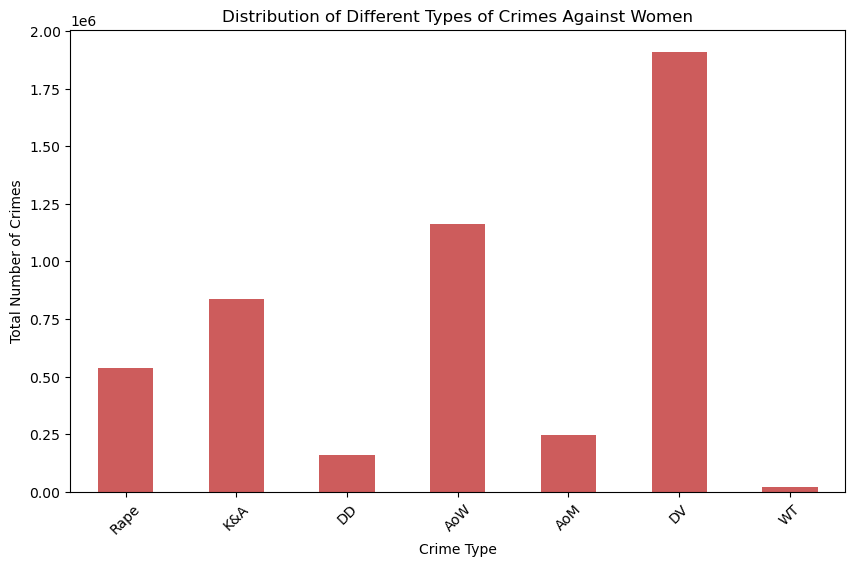

In [21]:
crimeDistribution =crimeAw.drop(['State', 'Year'], axis=1).sum()
plt.figure(figsize=(10, 6))
crimeDistribution.plot(kind='bar', color='#CD5C5C')
plt.title('Distribution of Different Types of Crimes Against Women')
plt.xlabel('Crime Type')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45)
plt.show()

'0.13.2'